# Dogs vs Cats using CNN

### Importing Libraries

In [1]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

## (1) Data Preprocessing

### Preprocessing Traing Set

In [2]:
train_datagen = ImageDataGenerator(rescale = 1./255, shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True)
train_generator = train_datagen.flow_from_directory('dataset/training_set', target_size = (64, 64), batch_size = 32,
                                                     class_mode = 'binary')

Found 8000 images belonging to 2 classes.


### Preprocessing Test Data

In [3]:
test_datagen = ImageDataGenerator(rescale = 1./255)
validation_generator = test_datagen.flow_from_directory('dataset/test_set', target_size = (64, 64), batch_size = 32,
                                                         class_mode = 'binary')

Found 2000 images belonging to 2 classes.


## (2) Building CNN Model

### Step 1 - Initialising CNN

In [4]:
cnn = tf.keras.models.Sequential()

### Step 2 - Convolution

In [5]:
cnn.add(tf.keras.layers.Conv2D(filters = 32, kernel_size = 3, activation = 'relu', input_shape = [64, 64, 3]))

### Step 3 - Pooling

In [6]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size = 2, strides = 2))

### Adding a second Convolution Layer

In [7]:
cnn.add(tf.keras.layers.Conv2D(filters = 32, kernel_size = 3, activation = 'relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size = 2, strides = 2))

### Step 4 - Flattening

In [8]:
cnn.add(tf.keras.layers.Flatten())

### Step 5 - Full Connection

In [9]:
cnn.add(tf.keras.layers.Dense(units = 128, activation = 'relu'))

### Step 6 - Output Layer

In [10]:
cnn.add(tf.keras.layers.Dense(units = 1, activation = 'sigmoid'))

## (3) Training CNN Model

### Compiling CNN Model

In [11]:
#Compile the model
cnn.compile(optimizer = 'adam', metrics = ['accuracy'], loss = 'binary_crossentropy')

### Training CNN Model on Training set and evaluating it on Test set

In [12]:
#Train the model
history = cnn.fit(x = train_generator, validation_data = validation_generator, epochs = 3)

Epoch 1/3
250/250 [==============================] - 98s 388ms/step - loss: 0.6849 - accuracy: 0.5500 - val_loss: 0.7313 - val_accuracy: 0.5345
Epoch 2/3
250/250 [==============================] - -15939s -64013508us/step - loss: 0.6249 - accuracy: 0.6510 - val_loss: 0.5801 - val_accuracy: 0.7200
Epoch 3/3
250/250 [==============================] - 34s 138ms/step - loss: 0.5841 - accuracy: 0.6911 - val_loss: 0.5550 - val_accuracy: 0.7165


## (4) Make single prediction

In [17]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img("dataset/single_prediction/prediction2.jpg", target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)

result = cnn.predict(test_image)

train_generator.class_indices

if result[0][0] == 1:
  prediction = 'cat'
else:
  prediction = 'dog'

print(prediction)

cat


## (5) Progress of CNN

### Importing Matplotlib

In [17]:
import matplotlib.pyplot as plt
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


### Plotting Progress

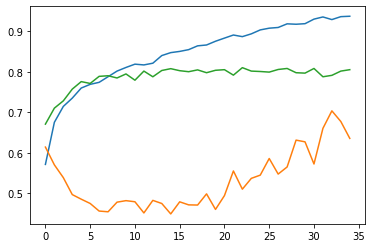

In [18]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_loss'])
plt.plot(history.history['val_accuracy'])